In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import math
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,146.177811
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.964386
2019-01-09,154.529999,149.630005,151.289993,153.309998,45099100.0,151.494064
2019-01-10,153.970001,150.860001,152.500000,153.800003,35780700.0,151.978271
2019-01-11,153.699997,151.509995,152.880005,152.289993,27023200.0,150.486160


In [2]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-01-07,146.177811,54777800.0,1.980672,-0.517824
2019-01-08,148.964386,41025300.0,2.189057,0.795669
2019-01-09,151.494064,45099100.0,3.196135,1.335187
2019-01-10,151.978271,35780700.0,2.022107,0.852461
2019-01-11,150.486160,27023200.0,1.438048,-0.385931


In [3]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train = X[:-forecast_out] 
X_test = X_lately # X[-forecast_out:]
y_train = y[:-forecast_out]
y_test = y[-forecast_out:]
#, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

c:\users\cleme\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [6]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print(confidencereg)
print(confidencepoly2)
print(confidenceknn)

0.9818042475706911
0.9296973079244236
-1.5685375710203269


In [7]:
# Plot of linear regression
reg_prediction = clfreg.predict(X_test)
poly2_prediction = clfpoly2.predict(X_test)
knn_prediction = clfknn.predict(X_test)

## Linear Regression plot

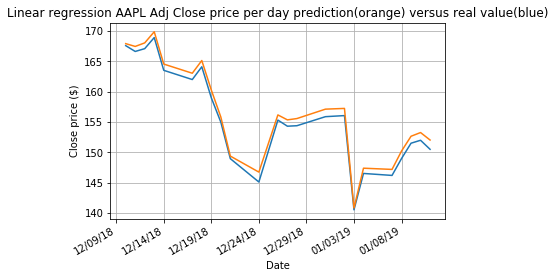

In [8]:
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
# Data for plotting
x_axis_date = [i for i in list(dfreg.index)[-forecast_out:]]
y_axis_real_close_value = [i for i in dfreg['Adj Close'][-forecast_out:]]

fig, ax = plt.subplots()
ax.plot(x_axis_date, y_axis_real_close_value)
ax.plot(x_axis_date, reg_prediction)

days = mdates.DayLocator(interval=5)
days_fmt = mdates.DateFormatter('%D')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

ax.grid(True)

ax.set(xlabel='Date', ylabel='Close price ($)',
       title='Linear regression AAPL Adj Close price per day prediction(orange) versus real value(blue)')

fig.autofmt_xdate()

plt.show()

## Quadratic regression 2 plot

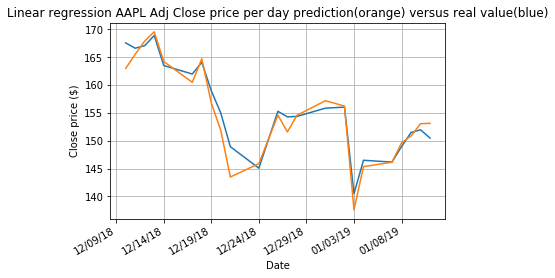

In [9]:
fig, ax = plt.subplots()
ax.plot(x_axis_date, y_axis_real_close_value)
ax.plot(x_axis_date, poly2_prediction)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

ax.grid(True)

ax.set(xlabel='Date', ylabel='Close price ($)',
       title='Linear regression AAPL Adj Close price per day prediction(orange) versus real value(blue)')

fig.autofmt_xdate()

plt.show()

## KNN Regression plot

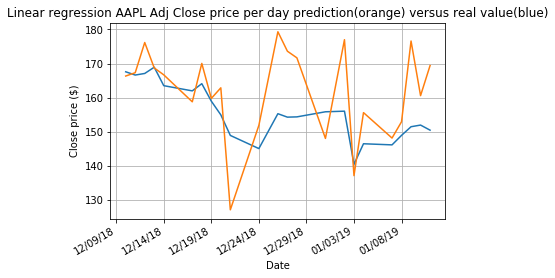

In [10]:
fig, ax = plt.subplots()
ax.plot(x_axis_date, y_axis_real_close_value)
ax.plot(x_axis_date, knn_prediction)

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

ax.grid(True)

ax.set(xlabel='Date', ylabel='Close price ($)',
       title='Linear regression AAPL Adj Close price per day prediction(orange) versus real value(blue)')

fig.autofmt_xdate()

plt.show()